In [15]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [17]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../..")

print('Current location: ', os.getcwd())

Current location:  /home/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance


# Visualizations

In [18]:
from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.visualizations import preprocess_metrics, create_group_base_and_fair_models_box_plot, \
    create_scatter_plot, create_group_models_box_plot_per_test_set

## Initialize Configs

In [19]:
EXPERIMENT_NAME = 'one_repair_lvl_many_models_pubcov_CA'
DB_COLLECTION_NAME = 'one_repair_lvl_many_models'
DATASET_NAME = 'Folktables_CA_2018_Public_Coverage'
EXPERIMENT_SESSION_UUID = 'b3bbd637-7974-4723-b5b7-bb4cf26e8bbb'
SENSITIVE_ATTRS = ['SEX', 'RAC1P', 'SEX&RAC1P']
# MODEL_NAMES = ['LGBMClassifier', 'LogisticRegression', 'RandomForestClassifier', 'MLPClassifier']
MODEL_NAMES = ['LogisticRegression', 'RandomForestClassifier']

In [20]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [21]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [22]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(152, 35)

In [23]:
models_metrics_dct[list(models_metrics_dct.keys())[0]][
    models_metrics_dct[list(models_metrics_dct.keys())[0]]['Experiment_Iteration'] == 'Exp_iter_1'
].head(20)

,Metric,Bootstrap_Model_Seed,Model_Name,Model_Params,Run_Number,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
0,Accuracy,101,LogisticRegression,"{'C': 1.0, 'class_weight': None, 'dual': False...",Run_1,Folktables_CA_2018_Public_Coverage,20,0,OK,2023-08-01 22:04:44.613,...,0.665741,1.000000,0.000000,0.684086,1.000000,0.000000,0.676292,1.000000,0.000000,0.680667
1,Accuracy,101,LogisticRegression,"{'C': 1.0, 'class_weight': None, 'dual': False...",Run_1,Folktables_CA_2018_Public_Coverage,20,0,OK,2023-08-01 22:06:11.778,...,0.660185,1.000000,0.000000,0.681710,1.000000,0.000000,0.667173,1.000000,0.000000,0.675333
2,Accuracy,101,LogisticRegression,"{'C': 1.0, 'class_weight': None, 'dual': False...",Run_1,Folktables_CA_2018_Public_Coverage,20,1,OK,2023-08-01 22:04:44.636,...,0.680556,1.000000,0.000000,0.693587,1.000000,0.000000,0.655015,1.000000,0.000000,0.676667
3,Accuracy,101,LogisticRegression,"{'C': 1.0, 'class_weight': None, 'dual': False...",Run_1,Folktables_CA_2018_Public_Coverage,20,1,OK,2023-08-01 22:06:11.789,...,0.678704,1.000000,0.000000,0.692399,1.000000,0.000000,0.653495,1.000000,0.000000,0.675333
4,Accuracy,101,LogisticRegression,"{'C': 1.0, 'class_weight': None, 'dual': False...",Run_1,Folktables_CA_2018_Public_Coverage,20,2,OK,2023-08-01 22:04:44.648,...,0.759259,1.000000,0.000000,0.767221,1.000000,0.000000,0.759878,1.000000,0.000000,0.764000
5,Accuracy,101,LogisticRegression,"{'C': 1.0, 'class_weight': None, 'dual': False...",Run_1,Folktables_CA_2018_Public_Coverage,20,2,OK,2023-08-01 22:06:11.802,...,0.757407,1.000000,0.000000,0.767221,1.000000,0.000000,0.761398,1.000000,0.000000,0.764667
6,Accuracy,101,LogisticRegression,"{'C': 1.0, 'class_weight': None, 'dual': False...",Run_1,Folktables_CA_2018_Public_Coverage,20,3,OK,2023-08-01 22:04:44.660,...,0.753704,1.000000,0.000000,0.741093,1.000000,0.000000,0.750760,1.000000,0.000000,0.745333
7,Accuracy,101,LogisticRegression,"{'C': 1.0, 'class_weight': None, 'dual': False...",Run_1,Folktables_CA_2018_Public_Coverage,20,3,OK,2023-08-01 22:06:11.814,...,0.756481,1.000000,0.000000,0.748219,1.000000,0.000000,0.753799,1.000000,0.000000,0.750667
16,Aleatoric_Uncertainty,101,LogisticRegression,"{'C': 1.0, 'class_weight': None, 'dual': False...",Run_1,Folktables_CA_2018_Public_Coverage,20,0,OK,2023-08-01 22:04:44.613,...,0.837572,0.812893,0.886724,0.845152,0.820785,0.897918,0.835310,0.814085,0.879654,0.840835
17,Aleatoric_Uncertainty,101,LogisticRegression,"{'C': 1.0, 'class_weight': None, 'dual': False...",Run_1,Folktables_CA_2018_Public_Coverage,20,0,OK,2023-08-01 22:06:11.778,...,0.839898,0.814233,0.889759,0.846621,0.822137,0.899062,0.838402,0.815303,0.884704,0.843016


In [24]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct_for_mult_test_sets()

In [25]:
exp_subgroup_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.0][3].head(20)

,Metric,Bootstrap_Model_Seed,Model_Name,Model_Params,Run_Number,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
15,Accuracy,101,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_CA_2018_Public_Coverage,20,3,OK,2023-08-01 22:04:44.706,...,0.763889,1.000000,0.000000,0.741093,1.000000,0.000000,0.776596,1.000000,0.000000,0.756667
31,Aleatoric_Uncertainty,101,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_CA_2018_Public_Coverage,20,3,OK,2023-08-01 22:04:44.706,...,0.690785,0.656972,0.800181,0.684747,0.646530,0.794142,0.696710,0.667384,0.798654,0.689995
47,F1,101,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_CA_2018_Public_Coverage,20,3,OK,2023-08-01 22:04:44.706,...,0.514286,1.000000,0.000000,0.460396,1.000000,0.000000,0.530351,1.000000,0.000000,0.490934
63,FNR,101,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_CA_2018_Public_Coverage,20,3,OK,2023-08-01 22:04:44.706,...,0.357143,0.000000,1.000000,0.396104,0.000000,1.000000,0.366412,0.000000,1.000000,0.382456
79,FPR,101,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_CA_2018_Public_Coverage,20,3,OK,2023-08-01 22:04:44.706,...,0.206897,0.000000,1.000000,0.228198,0.000000,1.000000,0.187856,0.000000,1.000000,0.210700
95,IQR,101,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_CA_2018_Public_Coverage,20,3,OK,2023-08-01 22:04:44.706,...,0.149638,0.142208,0.173677,0.150709,0.142284,0.174825,0.150347,0.144068,0.172174,0.150550
111,Jitter,101,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_CA_2018_Public_Coverage,20,3,OK,2023-08-01 22:04:44.706,...,0.173733,0.147445,0.258782,0.174597,0.146972,0.253670,0.174844,0.150046,0.261045,0.174705
127,Label_Stability,101,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_CA_2018_Public_Coverage,20,3,OK,2023-08-01 22:04:44.706,...,0.754444,0.795152,0.622745,0.752257,0.793750,0.633486,0.756079,0.795303,0.619728,0.753933
143,Mean,101,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_CA_2018_Public_Coverage,20,3,OK,2023-08-01 22:04:44.706,...,0.626361,0.678256,0.458466,0.633912,0.688764,0.476904,0.627084,0.676488,0.455346,0.630917
159,Overall_Uncertainty,101,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_CA_2018_Public_Coverage,20,3,OK,2023-08-01 22:04:44.706,...,0.750686,0.714766,0.866897,0.746285,0.705560,0.862857,0.757570,0.726615,0.865179,0.751236


In [26]:
exp_group_metrics_dct = exp_composer.compose_group_metrics_for_mult_test_sets(exp_subgroup_metrics_dct)

In [27]:
exp_group_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.0][3].head(20)

,Metric,SEX,RAC1P,SEX&RAC1P,Model_Name,Experiment_Iteration,Intervention_Param,Test_Set_Index
0,Equalized_Odds_TPR,-0.029692,-0.046402,-0.096190,RandomForestClassifier,Exp_iter_1,0.0,3
1,Equalized_Odds_FPR,0.040342,0.016005,0.013393,RandomForestClassifier,Exp_iter_1,0.0,3
2,Equalized_Odds_FNR,0.029692,0.046402,0.096190,RandomForestClassifier,Exp_iter_1,0.0,3
3,Disparate_Impact,1.168474,1.056937,1.040000,RandomForestClassifier,Exp_iter_1,0.0,3
4,Statistical_Parity_Difference,0.234064,0.084119,0.060000,RandomForestClassifier,Exp_iter_1,0.0,3
5,Accuracy_Parity,-0.035503,-0.019938,-0.025794,RandomForestClassifier,Exp_iter_1,0.0,3
6,Label_Stability_Ratio,0.994944,0.980922,0.997580,RandomForestClassifier,Exp_iter_1,0.0,3
7,IQR_Parity,0.000362,0.004190,0.003255,RandomForestClassifier,Exp_iter_1,0.0,3
8,Std_Parity,-0.000473,0.002726,0.003131,RandomForestClassifier,Exp_iter_1,0.0,3
9,Std_Ratio,0.995787,1.024604,1.028156,RandomForestClassifier,Exp_iter_1,0.0,3


## Figure 1. Subgroup boxplots.

In [28]:
melted_all_subgroup_metrics_per_model_dct, melted_all_group_metrics_per_model_dct = \
    preprocess_metrics(exp_subgroup_metrics_dct, exp_group_metrics_dct)

In [29]:
vals_to_replace = {
    'Model_Name': {
        'LGBMClassifier': 'LGBM',
        'LogisticRegression': 'LR',
        'RandomForestClassifier': 'RF',
        'MLPClassifier': 'MLP'
    }
}

<Figure size 1200x600 with 0 Axes>

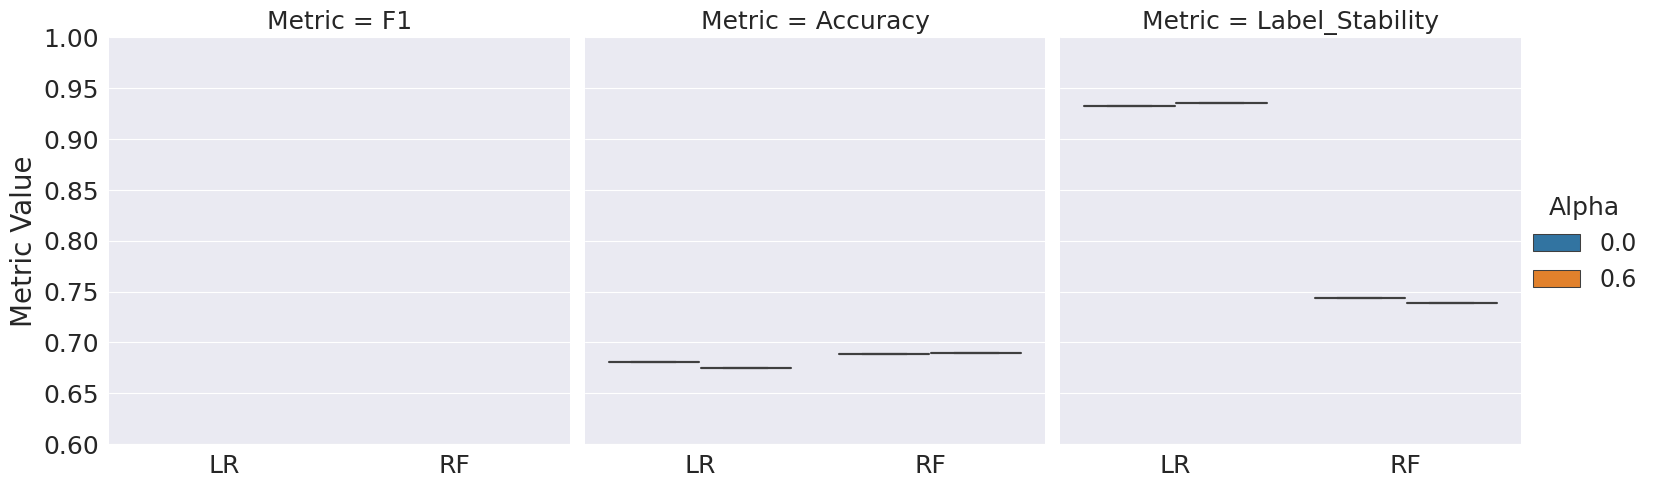

In [30]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.6, 1.0),
                                           metric_names=['F1', 'Accuracy', 'Label_Stability'],
                                           vals_to_replace=vals_to_replace)

## Figure 2. Create group boxplots.

<Figure size 1200x600 with 0 Axes>

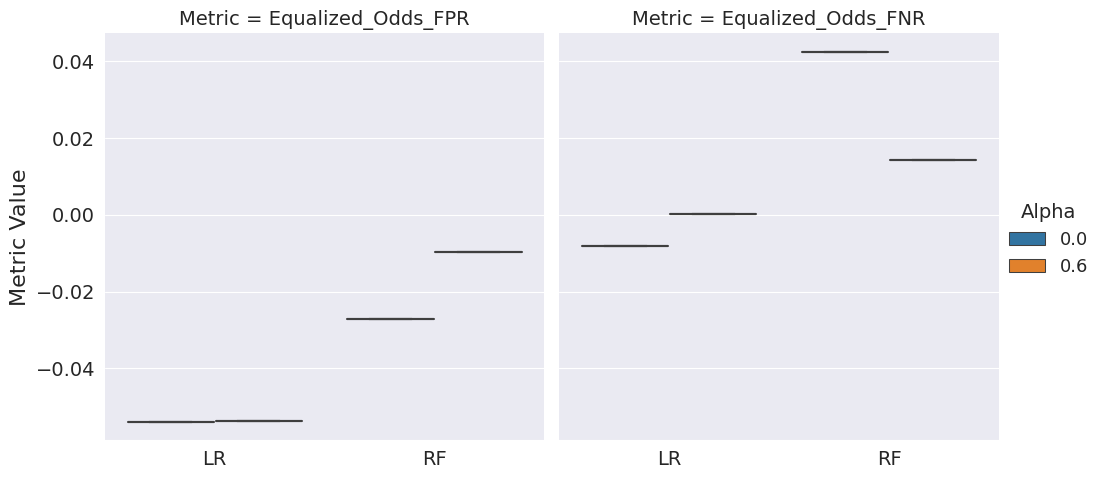

In [31]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='RAC1P',
                                           metric_names=['Equalized_Odds_FPR', 'Equalized_Odds_FNR'],
                                           vals_to_replace=vals_to_replace)

## Figure 5. Out-of-domain boxplots.

In [39]:
new_vals_to_replace = vals_to_replace
new_vals_to_replace['Test_Set_Index'] = {
    0: 'CA 2018',
    1: 'CA 2017',
    2: 'TX 2018',
    3: 'TX 2017',
}

<Figure size 1200x600 with 0 Axes>

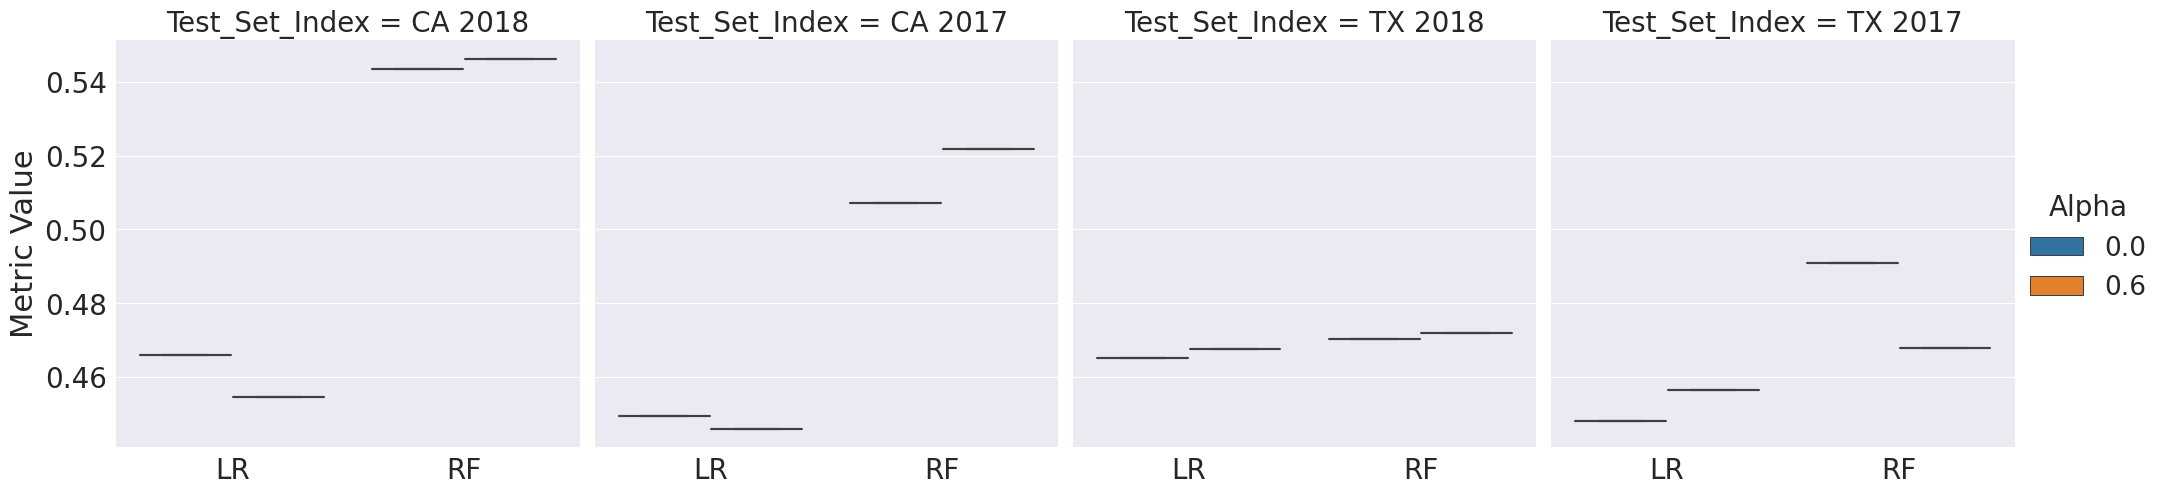

In [40]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='F1',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

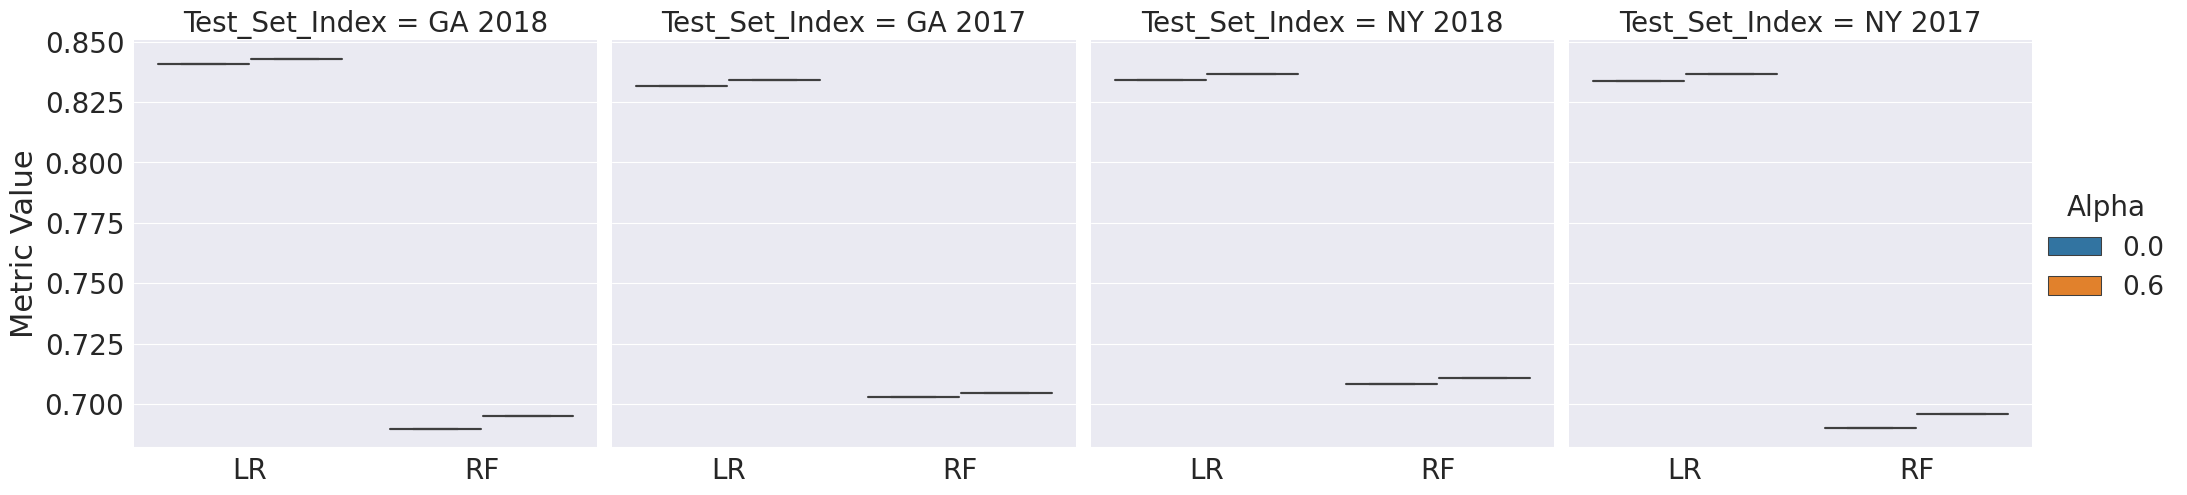

In [34]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Aleatoric_Uncertainty',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

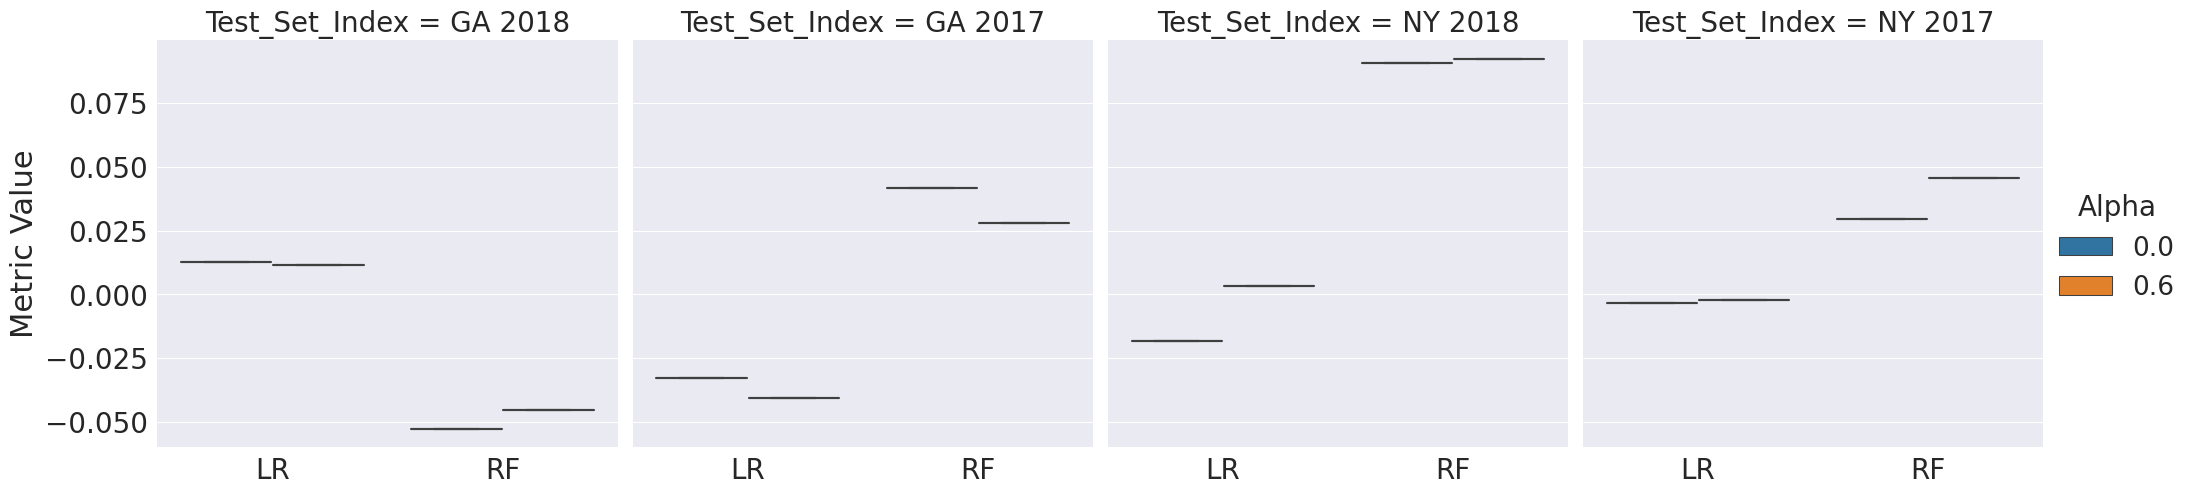

In [35]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FNR', group='SEX',
                                          vals_to_replace=new_vals_to_replace)

## Figure 3. Scatter plots.

In [36]:
create_scatter_plot(melted_all_group_metrics_per_model_dct,
                    group='SEX',
                    fairness_metric_name='Equalized_Odds_FPR',
                    stability_metric_name='Label_Stability_Ratio')

alt.Chart(...)

In [37]:
create_scatter_plot(melted_all_group_metrics_per_model_dct,
                    group='SEX&RAC1P',
                    fairness_metric_name='Equalized_Odds_FPR',
                    stability_metric_name='Label_Stability_Ratio')

alt.Chart(...)

In [38]:
create_scatter_plot(melted_all_group_metrics_per_model_dct,
                    group='RAC1P',
                    fairness_metric_name='Equalized_Odds_FNR',
                    stability_metric_name='Label_Stability_Ratio')

alt.Chart(...)